##  Week 4 Assignment : Exploratory Data Analysis (EDA) — Titanic Dataset

 1. Import Required Libraries.

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2. Load the Titanic dataset from seaborn.

In [157]:
df = sns.load_dataset('titanic')

In [158]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


3. Understand Dataset Structure.

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [160]:
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


4. Missing Values Analysis.

In [161]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percent})
missing_df[missing_df['Missing Values'] > 0]

,Missing Values,Percentage
age,177,19.865320
embarked,2,0.224467
deck,688,77.216611
embark_town,2,0.224467


 5. Univariate Analysis (Distributions).

Categorical Features:

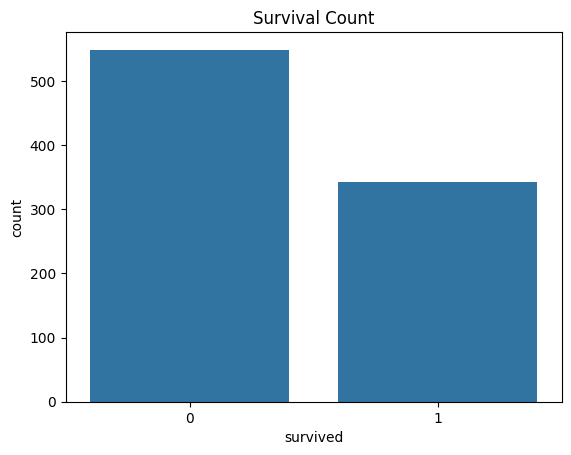

In [162]:
# Survived
sns.countplot(x='survived', data=df)
plt.title("Survival Count")
plt.show()


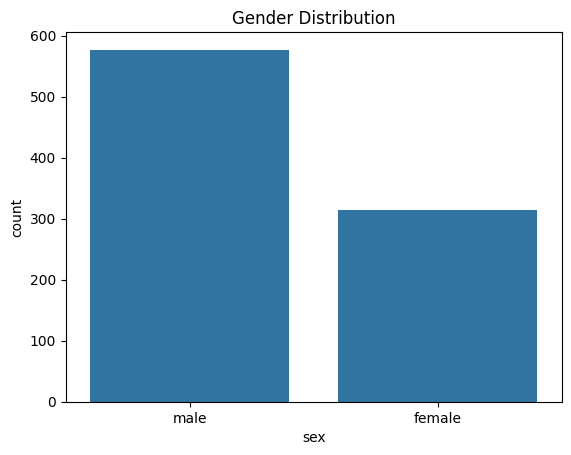

In [163]:
# Sex
sns.countplot(x='sex', data=df)
plt.title("Gender Distribution")
plt.show()

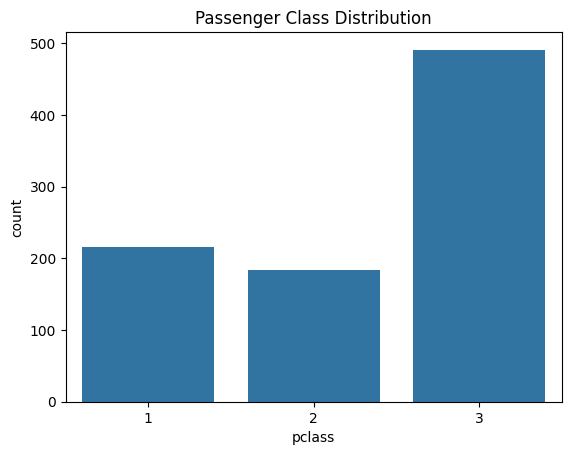

In [164]:
# Passenger Class
sns.countplot(x='pclass', data=df)
plt.title("Passenger Class Distribution")
plt.show()


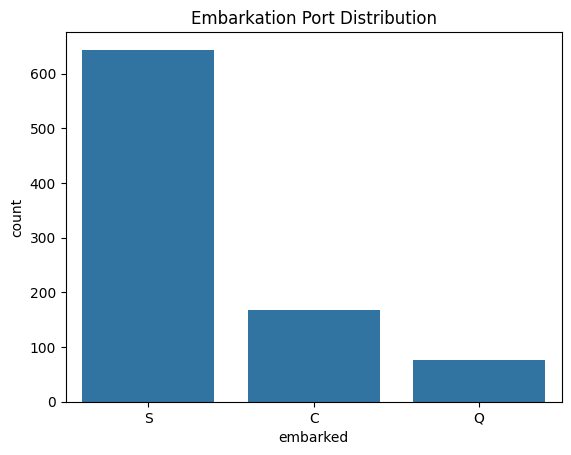

In [165]:
# Embarked
sns.countplot(x='embarked', data=df)
plt.title("Embarkation Port Distribution")
plt.show()


Numerical Features:

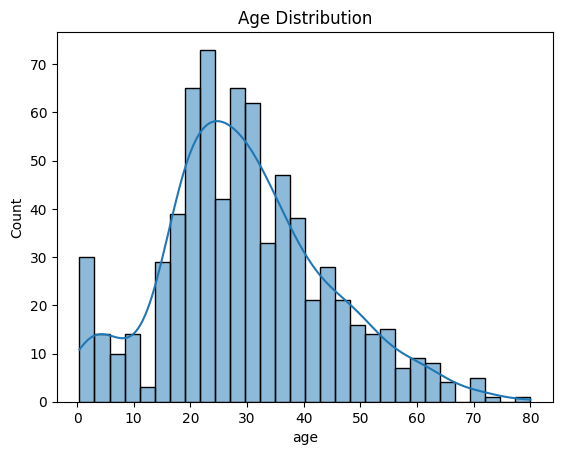

In [166]:
# Age
sns.histplot(df['age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


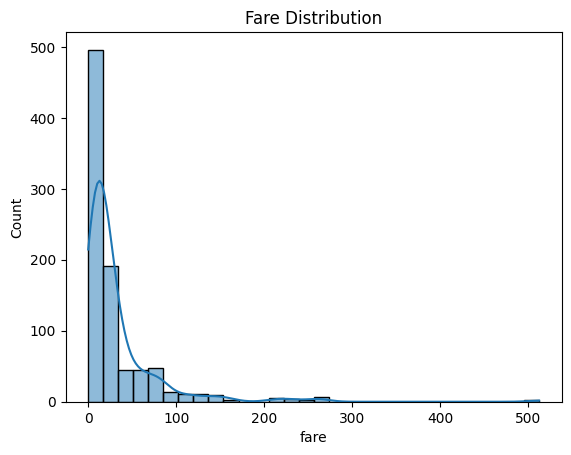

In [167]:
# Fare
sns.histplot(df['fare'], bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()

6. Outlier Detection.

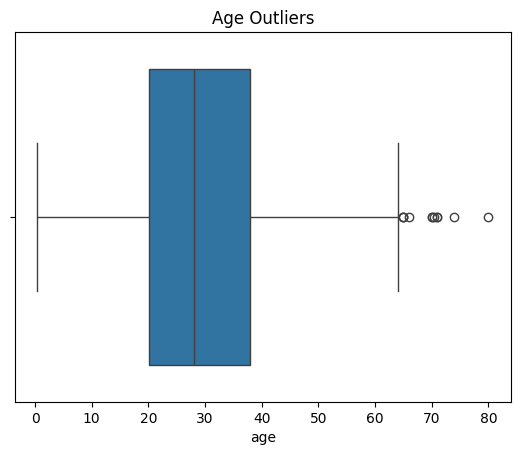

In [168]:
# Age outliers
sns.boxplot(x=df['age'])
plt.title("Age Outliers")
plt.show()

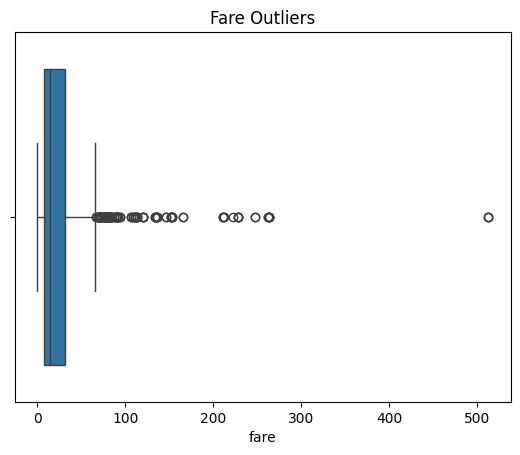

In [169]:
# Fare outliers
sns.boxplot(x=df['fare'])
plt.title("Fare Outliers")
plt.show()

7. Bivariate Analysis (Relationships).

Survival by Gender:

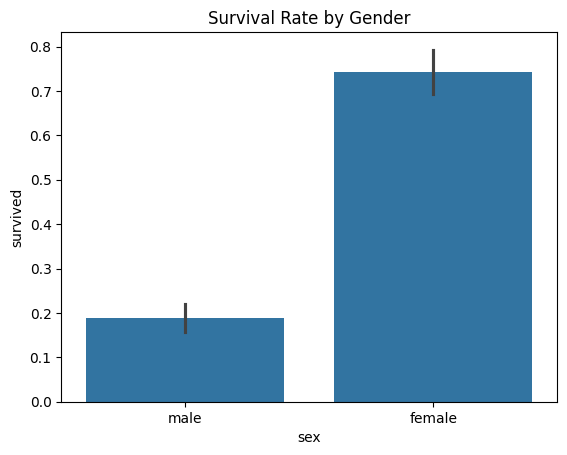

In [170]:
sns.barplot(x='sex', y='survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()


Survival by Class:

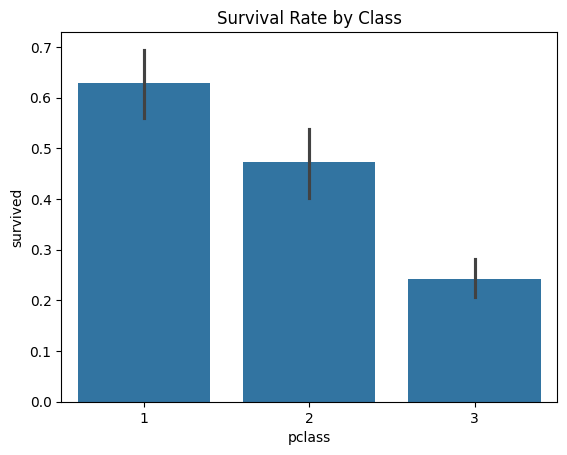

In [171]:
sns.barplot(x='pclass', y='survived', data=df)
plt.title("Survival Rate by Class")
plt.show()


Age vs Survival:

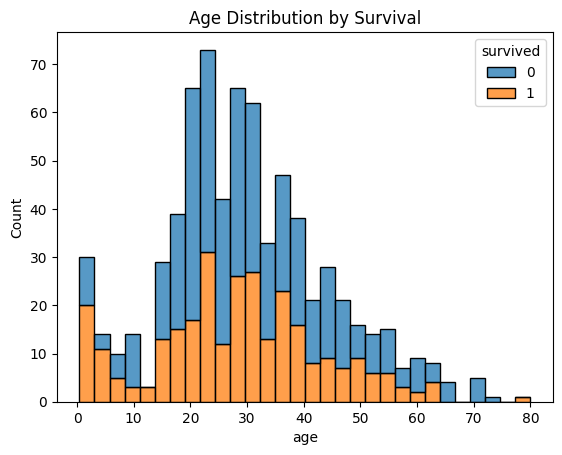

In [172]:
sns.histplot(data=df, x='age', hue='survived', bins=30, multiple='stack')
plt.title("Age Distribution by Survival")
plt.show()


Fare vs Survival:

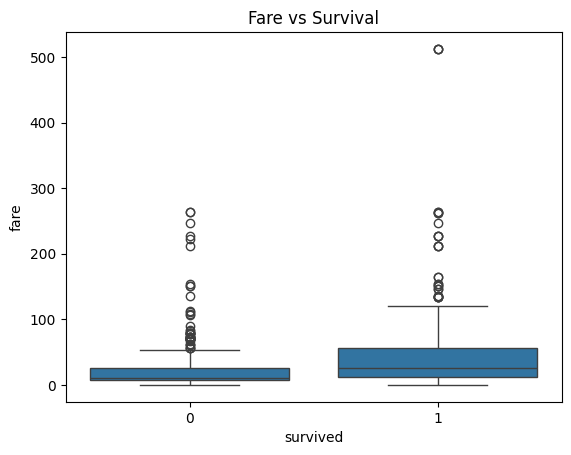

In [173]:
sns.boxplot(x='survived', y='fare', data=df)
plt.title("Fare vs Survival")
plt.show()


Embarked vs Survival:

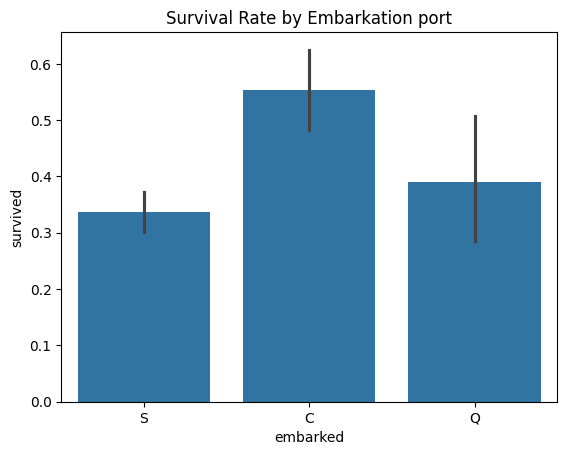

In [174]:
sns.barplot(x='embarked', y='survived', data=df)
plt.title("Survival Rate by Embarkation port")
plt.show()


 8. Correlation Heatmap.

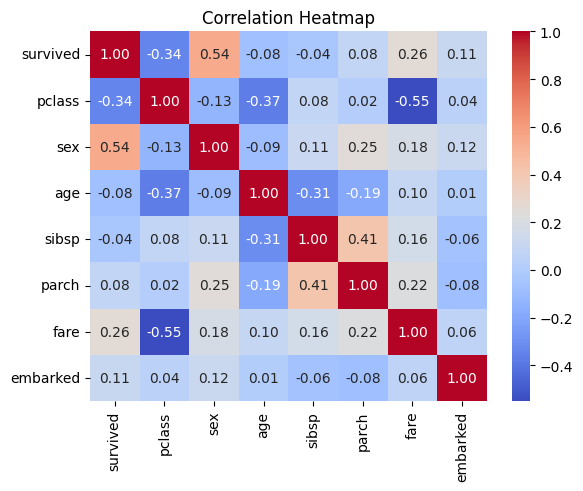

In [175]:

df_encoded = df.copy()

df_encoded['sex'] = df_encoded['sex'].map({'male': 0, 'female': 1})
df_encoded['embarked'] = df_encoded['embarked'].map({'S': 0, 'C': 1, 'Q': 2})


df_encoded = df_encoded.select_dtypes(include=['number'])

sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()
